In [8]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/opt_ml 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/1QNXRCspPbcnTfYOaZQlkUzKP872ZM7BA/opt_ml


In [9]:
import utils
import data
import torch
import torch.nn as nn
import torch.optim as optim
import pickle

In [ ]:
train_loader, test_loader = data.dataload()
alexnet, device = utils.loadmodel()
alexnet

Files already downloaded and verified
Files already downloaded and verified


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

cuda:0


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
   

RMSProp - No corruption

In [ ]:
criterion = nn.CrossEntropyLoss()
rms_optimizer = optim.RMSprop(alexnet.parameters(), lr=0.00001, weight_decay=1e-4 )
rms_accuracies, rms_losses = utils.train(alexnet, rms_optimizer, criterion, train_loader, device)

Epoch 1 accuracy: 77.39. Loss: 0.655
Epoch 2 accuracy: 86.83. Loss: 0.382
Epoch 3 accuracy: 91.02. Loss: 0.272
Epoch 4 accuracy: 93.82. Loss: 0.194
Epoch 5 accuracy: 96.24. Loss: 0.131
Epoch 6 accuracy: 97.90. Loss: 0.083
Epoch 7 accuracy: 98.90. Loss: 0.052
Epoch 8 accuracy: 99.51. Loss: 0.030
Epoch 9 accuracy: 99.69. Loss: 0.022
Epoch 10 accuracy: 99.66. Loss: 0.019
Epoch 11 accuracy: 99.84. Loss: 0.012
Epoch 12 accuracy: 99.89. Loss: 0.008
Epoch 13 accuracy: 99.81. Loss: 0.015
Epoch 14 accuracy: 99.91. Loss: 0.010
Epoch 15 accuracy: 99.78. Loss: 0.018
Epoch 16 accuracy: 99.78. Loss: 0.014
Epoch 17 accuracy: 100.00. Loss: 0.001
Finished Training of AlexNet
Number of epochs until 100% accuracy: 17
Time taken: 849.2255237102509


In [ ]:
torch.save(alexnet.state_dict(), 'alexnet_baseline_rms.pt')
pickle.dump([rms_accuracies,rms_losses], open('baseline_rms_acc_loss.pkl', 'wb'))

**Label Corruption**

RMSprop - 20% corruption

In [ ]:
train_loader_corrupt20, _ = data.dataload(corrupt_prob=0.2)
alexnet, device = utils.loadmodel()
criterion = nn.CrossEntropyLoss()
rms_optimizer = optim.RMSprop(alexnet.parameters(), lr=0.00001, weight_decay=1e-4 )
rms_accuracies_c20, rms_losses_c20 = utils.train(alexnet, rms_optimizer, criterion, train_loader_corrupt20, device)

Files already downloaded and verified
Files already downloaded and verified
cuda:0
Epoch 1 accuracy: 62.03. Loss: 1.370
Epoch 2 accuracy: 70.16. Loss: 1.154
Epoch 3 accuracy: 73.42. Loss: 1.041
Epoch 4 accuracy: 76.02. Loss: 0.935
Epoch 5 accuracy: 78.50. Loss: 0.824
Epoch 6 accuracy: 80.98. Loss: 0.704
Epoch 7 accuracy: 83.78. Loss: 0.578
Epoch 8 accuracy: 87.37. Loss: 0.446
Epoch 9 accuracy: 91.13. Loss: 0.326
Epoch 10 accuracy: 94.54. Loss: 0.221
Epoch 11 accuracy: 97.25. Loss: 0.138
Epoch 12 accuracy: 98.58. Loss: 0.086
Epoch 13 accuracy: 99.38. Loss: 0.054
Epoch 14 accuracy: 99.34. Loss: 0.043
Epoch 15 accuracy: 99.56. Loss: 0.035
Epoch 16 accuracy: 99.39. Loss: 0.041
Epoch 17 accuracy: 99.56. Loss: 0.029
Epoch 18 accuracy: 99.52. Loss: 0.028
Epoch 19 accuracy: 99.58. Loss: 0.025
Epoch 20 accuracy: 99.72. Loss: 0.017
Epoch 21 accuracy: 99.64. Loss: 0.019
Epoch 22 accuracy: 99.69. Loss: 0.018
Epoch 23 accuracy: 99.52. Loss: 0.028
Epoch 24 accuracy: 99.68. Loss: 0.018
Epoch 25 accur

In [ ]:
torch.save(alexnet.state_dict(), 'alexnet_corrupt20_rms.pt')
pickle.dump([rms_accuracies_c20,rms_losses_c20], open('corrupt20_rms_acc_loss.pkl', 'wb'))

RMSprop - 40% corruption

In [ ]:
train_loader_corrupt40, _ = data.dataload(corrupt_prob=0.4)
alexnet, device = utils.loadmodel()
criterion = nn.CrossEntropyLoss()
rms_optimizer = optim.RMSprop(alexnet.parameters(), lr=0.00001, weight_decay=1e-4 )
rms_accuracies_c40, rms_losses_c40 = utils.train(alexnet, rms_optimizer, criterion, train_loader_corrupt40, device)

Files already downloaded and verified
Files already downloaded and verified


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

cuda:0
Epoch 1 accuracy: 47.22. Loss: 1.801
Epoch 2 accuracy: 54.00. Loss: 1.627
Epoch 3 accuracy: 56.92. Loss: 1.523
Epoch 4 accuracy: 59.38. Loss: 1.414
Epoch 5 accuracy: 61.72. Loss: 1.290
Epoch 6 accuracy: 65.04. Loss: 1.145
Epoch 7 accuracy: 69.80. Loss: 0.981
Epoch 8 accuracy: 75.65. Loss: 0.807
Epoch 9 accuracy: 81.83. Loss: 0.633
Epoch 10 accuracy: 87.57. Loss: 0.470
Epoch 11 accuracy: 92.68. Loss: 0.324
Epoch 12 accuracy: 95.99. Loss: 0.215
Epoch 13 accuracy: 97.93. Loss: 0.138
Epoch 14 accuracy: 98.83. Loss: 0.091
Epoch 15 accuracy: 99.18. Loss: 0.064
Epoch 16 accuracy: 99.12. Loss: 0.058
Epoch 17 accuracy: 99.50. Loss: 0.038
Epoch 18 accuracy: 99.24. Loss: 0.044
Epoch 19 accuracy: 99.36. Loss: 0.036
Epoch 20 accuracy: 99.32. Loss: 0.038
Epoch 21 accuracy: 99.52. Loss: 0.032
Epoch 22 accuracy: 99.68. Loss: 0.019
Epoch 23 accuracy: 99.46. Loss: 0.032
Epoch 24 accuracy: 99.53. Loss: 0.027
Epoch 25 accuracy: 99.68. Loss: 0.020
Epoch 26 accuracy: 99.40. Loss: 0.035
Epoch 27 accur

In [ ]:
torch.save(alexnet.state_dict(), 'alexnet_corrupt40_rms.pt')
pickle.dump([rms_accuracies_c40,rms_losses_c40], open('corrupt40_rms_acc_loss.pkl', 'wb'))

RMSprop - 60% corruption

In [ ]:
train_loader_corrupt60, _ = data.dataload(corrupt_prob=0.6)
alexnet, device = utils.loadmodel()
criterion = nn.CrossEntropyLoss()
rms_optimizer = optim.RMSprop(alexnet.parameters(), lr=0.00001, weight_decay=1e-4 )
rms_accuracies_c60, rms_losses_c60 = utils.train(alexnet, rms_optimizer, criterion, train_loader_corrupt60, device)

Files already downloaded and verified
Files already downloaded and verified
cuda:0
Epoch 1 accuracy: 32.73. Loss: 2.093
Epoch 2 accuracy: 38.74. Loss: 1.962
Epoch 3 accuracy: 41.32. Loss: 1.872
Epoch 4 accuracy: 43.76. Loss: 1.764
Epoch 5 accuracy: 47.06. Loss: 1.636
Epoch 6 accuracy: 52.11. Loss: 1.479
Epoch 7 accuracy: 58.45. Loss: 1.297
Epoch 8 accuracy: 65.85. Loss: 1.098
Epoch 9 accuracy: 73.85. Loss: 0.893
Epoch 10 accuracy: 81.40. Loss: 0.692
Epoch 11 accuracy: 88.17. Loss: 0.508
Epoch 12 accuracy: 93.17. Loss: 0.351
Epoch 13 accuracy: 96.36. Loss: 0.230
Epoch 14 accuracy: 98.13. Loss: 0.148
Epoch 15 accuracy: 98.81. Loss: 0.100
Epoch 16 accuracy: 99.12. Loss: 0.073
Epoch 17 accuracy: 99.13. Loss: 0.061
Epoch 18 accuracy: 99.09. Loss: 0.059
Epoch 19 accuracy: 99.44. Loss: 0.040
Epoch 20 accuracy: 99.44. Loss: 0.036
Epoch 21 accuracy: 99.13. Loss: 0.051
Epoch 22 accuracy: 99.58. Loss: 0.026
Epoch 23 accuracy: 99.42. Loss: 0.032
Epoch 24 accuracy: 99.55. Loss: 0.028
Epoch 25 accur

In [ ]:
torch.save(alexnet.state_dict(), 'alexnet_corrupt60_rms.pt')
pickle.dump([rms_accuracies_c60,rms_losses_c60], open('corrupt60_rms_acc_loss.pkl', 'wb'))

RMSprop - 80% corruption

In [ ]:
train_loader_corrupt80, _ = data.dataload(corrupt_prob=0.8)
alexnet, device = utils.loadmodel()
criterion = nn.CrossEntropyLoss()
rms_optimizer = optim.RMSprop(alexnet.parameters(), lr=0.00001, weight_decay=1e-4 )
rms_accuracies_c80, rms_losses_c80 = utils.train(alexnet, rms_optimizer, criterion, train_loader_corrupt80, device)

Files already downloaded and verified
Files already downloaded and verified


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

cuda:0
Epoch 1 accuracy: 18.79. Loss: 2.265
Epoch 2 accuracy: 23.82. Loss: 2.186
Epoch 3 accuracy: 26.68. Loss: 2.113
Epoch 4 accuracy: 30.27. Loss: 2.016
Epoch 5 accuracy: 35.68. Loss: 1.889
Epoch 6 accuracy: 42.66. Loss: 1.728
Epoch 7 accuracy: 50.18. Loss: 1.539
Epoch 8 accuracy: 58.72. Loss: 1.330
Epoch 9 accuracy: 67.60. Loss: 1.107
Epoch 10 accuracy: 75.73. Loss: 0.888
Epoch 11 accuracy: 83.27. Loss: 0.678
Epoch 12 accuracy: 89.32. Loss: 0.492
Epoch 13 accuracy: 93.89. Loss: 0.341
Epoch 14 accuracy: 96.75. Loss: 0.223
Epoch 15 accuracy: 98.20. Loss: 0.148
Epoch 16 accuracy: 99.04. Loss: 0.099
Epoch 17 accuracy: 99.28. Loss: 0.071
Epoch 18 accuracy: 99.40. Loss: 0.056
Epoch 19 accuracy: 99.20. Loss: 0.051
Epoch 20 accuracy: 99.51. Loss: 0.036
Epoch 21 accuracy: 99.41. Loss: 0.039
Epoch 22 accuracy: 99.44. Loss: 0.035
Epoch 23 accuracy: 99.41. Loss: 0.036
Epoch 24 accuracy: 99.60. Loss: 0.027
Epoch 25 accuracy: 99.31. Loss: 0.039
Epoch 26 accuracy: 99.58. Loss: 0.026
Epoch 27 accur

In [ ]:
torch.save(alexnet.state_dict(), 'alexnet_corrupt80_rms.pt')
pickle.dump([rms_accuracies_c80,rms_losses_c80], open('corrupt80_rms_acc_loss.pkl', 'wb'))

RMSprop - 100% corruption

In [ ]:
train_loader_corrupt100, _ = data.dataload(corrupt_prob=1)
alexnet, device = utils.loadmodel()
criterion = nn.CrossEntropyLoss()
rms_optimizer = optim.RMSprop(alexnet.parameters(), lr=0.00001, weight_decay=1e-4 )
rms_accuracies_c100, rms_losses_c100 = utils.train(alexnet, rms_optimizer, criterion, train_loader_corrupt100, device)

Files already downloaded and verified
Files already downloaded and verified


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

cuda:0
Epoch 1 accuracy: 10.00. Loss: 2.310
Epoch 2 accuracy: 12.34. Loss: 2.293
Epoch 3 accuracy: 15.23. Loss: 2.271
Epoch 4 accuracy: 18.44. Loss: 2.235
Epoch 5 accuracy: 22.12. Loss: 2.178
Epoch 6 accuracy: 26.38. Loss: 2.102
Epoch 7 accuracy: 31.16. Loss: 2.003
Epoch 8 accuracy: 36.41. Loss: 1.885
Epoch 9 accuracy: 42.40. Loss: 1.749
Epoch 10 accuracy: 48.47. Loss: 1.598
Epoch 11 accuracy: 55.28. Loss: 1.433
Epoch 12 accuracy: 61.52. Loss: 1.266
Epoch 13 accuracy: 67.69. Loss: 1.097
Epoch 14 accuracy: 73.68. Loss: 0.928
Epoch 15 accuracy: 79.32. Loss: 0.769
Epoch 16 accuracy: 84.30. Loss: 0.624
Epoch 17 accuracy: 88.31. Loss: 0.494
Epoch 18 accuracy: 91.89. Loss: 0.380
Epoch 19 accuracy: 94.37. Loss: 0.288
Epoch 20 accuracy: 96.14. Loss: 0.215
Epoch 21 accuracy: 97.43. Loss: 0.160
Epoch 22 accuracy: 98.25. Loss: 0.119
Epoch 23 accuracy: 98.80. Loss: 0.094
Epoch 24 accuracy: 98.77. Loss: 0.082
Epoch 25 accuracy: 99.04. Loss: 0.068
Epoch 26 accuracy: 99.17. Loss: 0.060
Epoch 27 accur

In [ ]:
torch.save(alexnet.state_dict(), 'alexnet_corrupt100_rms.pt')
pickle.dump([rms_accuracies_c100,rms_losses_c100], open('corrupt100_rms_acc_loss.pkl', 'wb'))

Label Corruption Results

In [ ]:
files=['baseline_rms_acc_loss.pkl', 'corrupt20_rms_acc_loss.pkl', 'corrupt40_rms_acc_loss.pkl', 
       'corrupt60_rms_acc_loss.pkl', 'corrupt80_rms_acc_loss.pkl', 'corrupt100_rms_acc_loss.pkl']
       
acc_list=[]  
loss_list=[]       
for f in files:
    open_file = open(f, "rb")
    results = pickle.load(open_file)
    open_file.close()
    acc_list.append(results[0])
    loss_list.append(results[1])


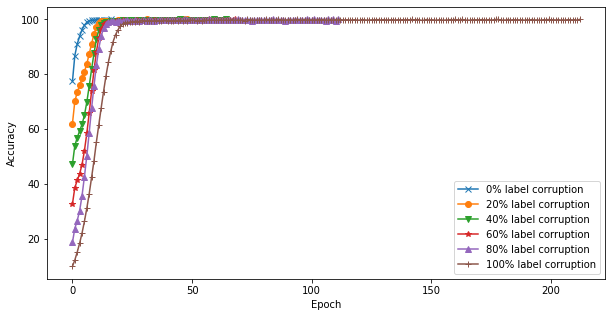

In [ ]:
import matplotlib.pyplot as plt
def plot(metric, label):
  plt.figure(figsize=(10,5))
  markers = ['x','o','v','*','^','+']
  for m, marker in zip(metric, markers):
    plt.plot(m, marker=marker)
  plt.legend([f'{x}% label corruption' for x in [0, 20, 40, 60, 80, 100]])
  plt.ylabel(label)
  plt.xlabel('Epoch')

plot(acc_list, 'Accuracy')

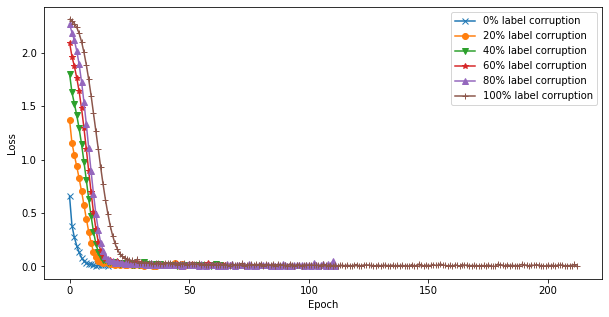

In [ ]:
plot(loss_list, 'Loss')

**Pixel Permutation & Noise**

Perm level = 1

In [ ]:
train_loader_perm1, _ = data.dataload(perm_level=1)
alexnet, device = utils.loadmodel()
criterion = nn.CrossEntropyLoss()
rms_optimizer = optim.RMSprop(alexnet.parameters(), lr=0.00001, weight_decay=1e-4 )
rms_accuracies_perm1, rms_losses_perm1 = utils.train(alexnet, rms_optimizer, criterion, train_loader_perm1, device)

Files already downloaded and verified
Files already downloaded and verified
cuda:0
Epoch 1 accuracy: 55.98. Loss: 1.234
Epoch 2 accuracy: 67.31. Loss: 0.930
Epoch 3 accuracy: 72.81. Loss: 0.783
Epoch 4 accuracy: 77.45. Loss: 0.664
Epoch 5 accuracy: 81.60. Loss: 0.556
Epoch 6 accuracy: 84.92. Loss: 0.455
Epoch 7 accuracy: 88.70. Loss: 0.363
Epoch 8 accuracy: 91.73. Loss: 0.278
Epoch 9 accuracy: 94.24. Loss: 0.207
Epoch 10 accuracy: 96.46. Loss: 0.146
Epoch 11 accuracy: 97.86. Loss: 0.102
Epoch 12 accuracy: 98.66. Loss: 0.072
Epoch 13 accuracy: 99.08. Loss: 0.059
Epoch 14 accuracy: 99.46. Loss: 0.041
Epoch 15 accuracy: 99.20. Loss: 0.044
Epoch 16 accuracy: 99.54. Loss: 0.033
Epoch 17 accuracy: 99.34. Loss: 0.036
Epoch 18 accuracy: 99.58. Loss: 0.031
Epoch 19 accuracy: 99.56. Loss: 0.031
Epoch 20 accuracy: 99.68. Loss: 0.028
Epoch 21 accuracy: 99.74. Loss: 0.023
Epoch 22 accuracy: 99.67. Loss: 0.024
Epoch 23 accuracy: 99.64. Loss: 0.028
Epoch 24 accuracy: 99.58. Loss: 0.028
Epoch 25 accur

In [ ]:
torch.save(alexnet.state_dict(), 'alexnet_perm1_rms.pt')
pickle.dump([rms_accuracies_perm1,rms_losses_perm1], open('perm1_rms_acc_loss.pkl', 'wb'))

Perm level = 2

In [ ]:
train_loader_perm2, _ = data.dataload(perm_level=2)
alexnet, device = utils.loadmodel()
criterion = nn.CrossEntropyLoss()
rms_optimizer = optim.RMSprop(alexnet.parameters(), lr=0.00001, weight_decay=1e-4 )
rms_accuracies_perm2, rms_losses_perm2 = utils.train(alexnet, rms_optimizer, criterion, train_loader_perm2, device)

Files already downloaded and verified
Files already downloaded and verified
cuda:0
Epoch 1 accuracy: 48.22. Loss: 1.440
Epoch 2 accuracy: 59.24. Loss: 1.155
Epoch 3 accuracy: 64.46. Loss: 1.013
Epoch 4 accuracy: 69.10. Loss: 0.896
Epoch 5 accuracy: 73.06. Loss: 0.787
Epoch 6 accuracy: 77.08. Loss: 0.684
Epoch 7 accuracy: 81.03. Loss: 0.582
Epoch 8 accuracy: 84.70. Loss: 0.481
Epoch 9 accuracy: 88.06. Loss: 0.390
Epoch 10 accuracy: 91.29. Loss: 0.303
Epoch 11 accuracy: 93.92. Loss: 0.228
Epoch 12 accuracy: 96.11. Loss: 0.166
Epoch 13 accuracy: 97.50. Loss: 0.119
Epoch 14 accuracy: 98.62. Loss: 0.082
Epoch 15 accuracy: 98.94. Loss: 0.066
Epoch 16 accuracy: 99.27. Loss: 0.050
Epoch 17 accuracy: 99.14. Loss: 0.050
Epoch 18 accuracy: 99.45. Loss: 0.040
Epoch 19 accuracy: 99.35. Loss: 0.040
Epoch 20 accuracy: 99.32. Loss: 0.045
Epoch 21 accuracy: 99.69. Loss: 0.021
Epoch 22 accuracy: 99.61. Loss: 0.030
Epoch 23 accuracy: 99.58. Loss: 0.030
Epoch 24 accuracy: 99.62. Loss: 0.023
Epoch 25 accur

In [ ]:
torch.save(alexnet.state_dict(), 'alexnet_perm2_rms.pt')
pickle.dump([rms_accuracies_perm2,rms_losses_perm2], open('perm2_rms_acc_loss.pkl', 'wb'))

Random Gaussian Noise

In [10]:
train_loader_rand, _ = data.dataload(random_noise=True)
alexnet, device = utils.loadmodel()
criterion = nn.CrossEntropyLoss()
rms_optimizer = optim.RMSprop(alexnet.parameters(), lr=0.00001, weight_decay=1e-4 )
rms_accuracies_rand, rms_losses_rand = utils.train(alexnet, rms_optimizer, criterion, train_loader_rand, device)

Files already downloaded and verified
Files already downloaded and verified
cuda:0


TypeError: ignored

In [ ]:
torch.save(alexnet.state_dict(), 'alexnet_rand_rms.pt')
pickle.dump([rms_accuracies_rand,rms_losses_rand], open('rand_rms_acc_loss.pkl', 'wb'))

Pixel Permutation Results

In [ ]:
files=['baseline_rms_acc_loss.pkl', 'perm1_rms_acc_loss.pkl', 'perm2_rms_acc_loss.pkl', 'rand_rms_acc_loss.pkl']
       
acc_list_perm=[]  
loss_list_perm=[]       
for f in files:
    open_file = open(f, "rb")
    results = pickle.load(open_file)
    open_file.close()
    acc_list_perm.append(results[0])
    loss_list_perm.append(results[1])


In [ ]:
import matplotlib.pyplot as plt
def plot(metric, label):
  plt.figure(figsize=(10,5))
  markers = ['x','o','v','*']
  for m, marker in zip(metric, markers):
    plt.plot(m, marker=marker)
  plt.legend([x for x in ['Original', 'Perm 1', 'Perm 2', 'Noise']])
  plt.ylabel(label)
  plt.xlabel('Epoch')

plot(acc_list, 'Accuracy')

In [ ]:
plot(acc_list, 'Loss')